# Eurovision 2016 song dataset for Clustering analysis

Original dataset from the [Eurovision](http://www.eurovision.tv/page/results)
and reconfigured by DataCamp named [Eurovision 2016](https://assets.datacamp.com/production/repositories/655/datasets/2a1f3ab7bcc76eef1b8e1eb29afbd54c4ebf86f2/eurovision-2016.csv)

In [1]:
# Get dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/2a1f3ab7bcc76eef1b8e1eb29afbd54c4ebf86f2/eurovision-2016.csv')

In [3]:
df.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [4]:
df['From country'].unique()

array(['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Montenegro', 'Norway',
       'Poland', 'Russia', 'San Marino', 'Serbia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'The Netherlands', 'Ukraine',
       'United Kingdom'], dtype=object)

In [14]:
df.fillna(0, inplace=True)

In [26]:
df.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,0.0,0.0
1,Albania,Czech Republic,21,15,25,23,16,22,22,0.0,0.0
2,Albania,The Netherlands,22,14,23,24,21,24,24,0.0,0.0
3,Albania,Azerbaijan,19,12,11,21,11,13,19,0.0,0.0
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [15]:
# Create a pivot of the original data so each row is one country
df_pivot = pd.pivot_table(df, index=['From country'], values='Jury Points', columns='To country')

In [28]:
df_pivot.fillna(0, inplace=True)

In [29]:
df_pivot.head()

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,0.0,12.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,10.0,...,0.0,2.0,0.0,7.0,0.0,6.0,0.0,0.0,0.0,5.0
Armenia,0.0,5.0,0.0,0.0,4.0,7.0,0.0,6.0,1.0,12.0,...,0.0,8.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
Australia,0.0,0.0,0.0,0.0,12.0,8.0,1.0,0.0,0.0,6.0,...,7.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,2.0,4.0
Austria,2.0,12.0,0.0,0.0,5.0,0.0,6.0,0.0,4.0,7.0,...,1.0,10.0,0.0,3.0,0.0,0.0,8.0,0.0,0.0,0.0
Azerbaijan,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,5.0,6.0,2.0,12.0,0.0,1.0,0.0,0.0,10.0,0.0


In [30]:
df_pivot.columns

Index(['Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech Republic', 'France', 'Georgia', 'Germany',
       'Hungary', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Poland',
       'Russia', 'Serbia', 'Spain', 'Sweden', 'The Netherlands', 'Ukraine',
       'United Kingdom'],
      dtype='object', name='To country')

In [31]:
# Make an array of samples
samples = df_pivot.values

In [32]:
len(samples)

42

In [40]:
country_names = df_pivot.index.values

In [41]:
country_names

array(['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Montenegro', 'Norway',
       'Poland', 'Russia', 'San Marino', 'Serbia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'The Netherlands', 'Ukraine',
       'United Kingdom'], dtype=object)

In [42]:
print(samples[0])

[ 0. 12.  0.  0.  0.  4.  0.  0.  0. 10.  0.  0.  1.  3.  8.  0.  0.  2.
  0.  7.  0.  6.  0.  0.  0.  5.]


In [43]:
print(samples)

[[ 0. 12.  0. ...  0.  0.  5.]
 [ 0.  5.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  3.  2.  4.]
 ...
 [ 2. 12.  8. ...  0.  3.  0.]
 [ 0.  5.  0. ...  0.  0.  0.]
 [ 0.  8.  0. ...  0. 10.  0.]]


In [44]:
# Create mergings and then plot into a dendrogram
mergings = linkage(samples, method='complete')

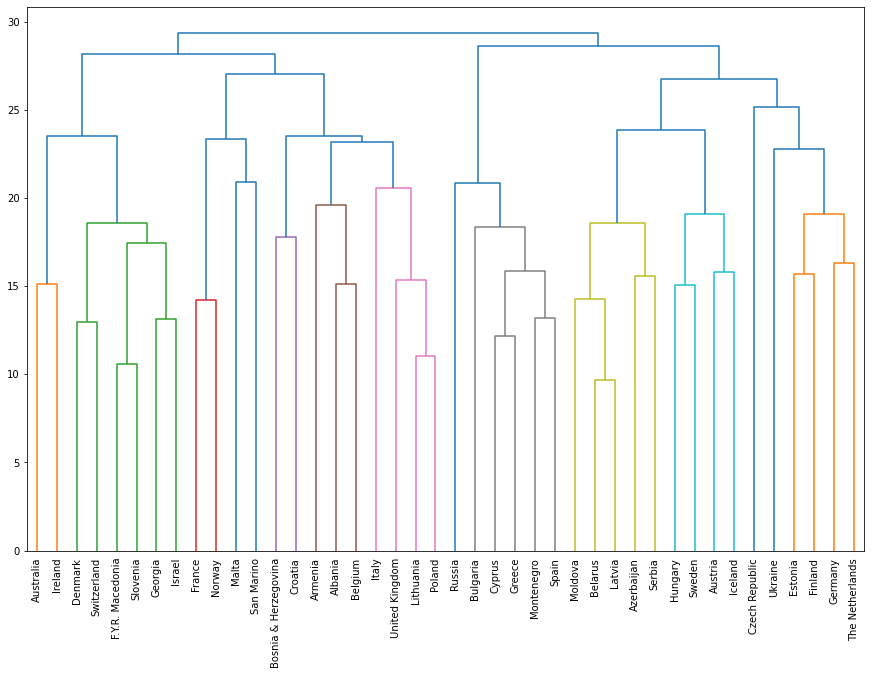

In [54]:
# Plot the dendrogram, using country_names as labels
fig, ax = plt.subplots(figsize=(15,10))
dendrogram(mergings,
          labels=country_names,
          leaf_rotation=90,
          leaf_font_size=10,
          ax=ax)
plt.show()

## Cluster using 'single' as the linkage method

In [51]:
# Create mergings and then plot into a dendrogram
s_mergings = linkage(samples, method='single')

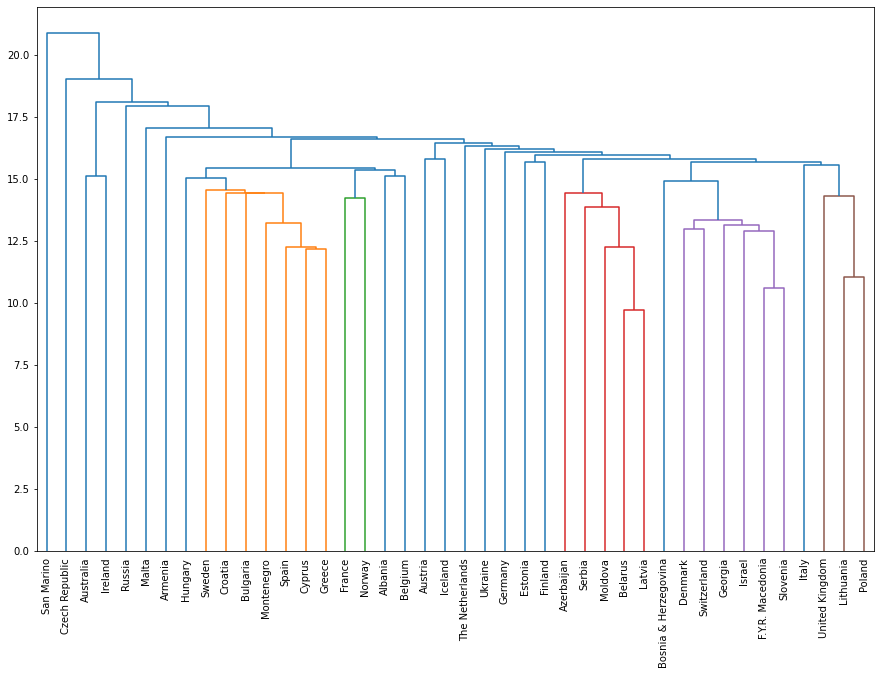

In [53]:
# Plot the dendrogram
fig, ax = plt.subplots(figsize=(15,10))
dendrogram(s_mergings,
          labels=country_names,
          leaf_rotation=90,
          leaf_font_size=10,
          ax=ax)
plt.show()

## Cluster labels using fcluster

In [47]:
# Import dependencies
from scipy.cluster.hierarchy import fcluster

In [48]:
f_labels = fcluster(mergings, 15, criterion='distance')
f_labels

array([11, 13,  1, 26, 22, 21, 12,  9, 19, 10, 17, 33,  3, 28,  4, 29,  6,
        5, 30, 17, 24, 27,  2,  5, 16, 21, 14,  7, 21, 18,  6, 14, 20,  8,
       23,  4, 18, 25,  3, 31, 32, 15], dtype=int32)

In [50]:
pairs = pd.DataFrame({'f_labels':f_labels, 'countries':country_names})
pairs.sort_values('f_labels')

,f_labels,countries
2,1,Australia
22,2,Ireland
38,3,Switzerland
12,3,Denmark
35,4,Slovenia
14,4,F.Y.R. Macedonia
23,5,Israel
17,5,Georgia
16,6,France
30,6,Norway
